<a href="https://colab.research.google.com/github/Project-Jezzz/Tim-Nabo-Blinders-Classification-Image-Sampah-Plastik-Kertas-Organik-/blob/main/WebAPP_Classification_Sampah_Tim_NABO_BLINDERS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 5.3 MB/s 
     |████████████████████████████████| 2.3 MB 41.8 MB/s 
     |████████████████████████████████| 84 kB 4.7 MB/s 
     |████████████████████████████████| 54 kB 4.8 MB/s 
     |████████████████████████████████| 275 kB 73.9 MB/s 
     |████████████████████████████████| 212 kB 73.3 MB/s 
     |████████████████████████████████| 141 kB 52.8 MB/s 
     |████████████████████████████████| 54 kB 4.4 MB/s 
     |████████████████████████████████| 84 kB 2.5 MB/s 
     |████████████████████████████████| 57 kB 6.4 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
     |████████████████████████████████| 80 kB 9.6 MB/s 
     |████████████████████████████████| 68 kB 7.7 MB/s 
     |████████████████████████████████| 43 kB 1.1 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 856 kB 66.5 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import gradio as gr

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
# import pathlib
# dataset_url = "https://download1337.mediafire.com/yhgits6y0kdg/e2l6lqmva4h1ae9/dataset_rempah.zip"
# data_dir = tf.keras.utils.get_file('dataset_rempah', origin=dataset_url, untar=True)
# # data_dir = pathlib.Path(data_dir)
data_dir = '/content/drive/MyDrive/image_classification_sampah'
print(data_dir)

/content/drive/MyDrive/image_classification_sampah


In [6]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 300 files belonging to 3 classes.
Using 210 files for training.


In [7]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.3,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 300 files belonging to 3 classes.
Using 90 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['Sampah Kertas', 'Sampah Organik', 'Sampah Plastik']


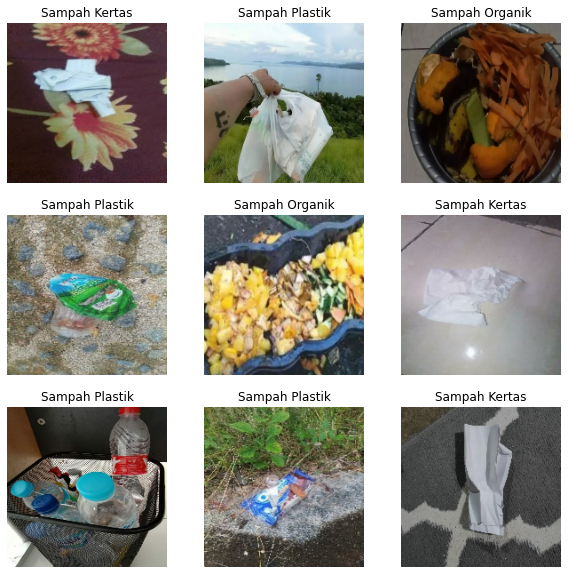

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


7/7 [==============================] - 21s 1s/step - loss: 1.8768 - accuracy: 0.3381 - val_loss: 1.1172 - val_accuracy: 0.3556
Epoch 2/20
7/7 [==============================] - 2s 101ms/step - loss: 1.0524 - accuracy: 0.4238 - val_loss: 0.9696 - val_accuracy: 0.4778
Epoch 3/20
7/7 [==============================] - 2s 132ms/step - loss: 0.9084 - accuracy: 0.5381 - val_loss: 0.8360 - val_accuracy: 0.6111
Epoch 4/20
7/7 [==============================] - 2s 147ms/step - loss: 0.7780 - accuracy: 0.6476 - val_loss: 0.8475 - val_accuracy: 0.6222
Epoch 5/20
7/7 [==============================] - 2s 107ms/step - loss: 0.7080 - accuracy: 0.6810 - val_loss: 0.7395 - val_accuracy: 0.7000
Epoch 6/20
7/7 [==============================] - 2s 106ms/step - loss: 0.6114 - accuracy: 0.7667 - val_loss: 0.7009 - val_accuracy: 0.6667
Epoch 7/20
7/7 [==============================] - 2s 109ms/step - loss: 0.5070 - accuracy: 0.8429 - val_loss: 0.6871 - val_accuracy: 0.7333
Epoch 8/20
7/7 [=================

In [13]:
def predict_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(3)}

In [ ]:
image = gr.inputs.Image(shape=(180,180))
label = gr.outputs.Label(num_top_classes=5)
  
gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://52595.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces
